# Variando Parâmetros Manualmente

In [1]:
% display typeset

In [9]:
def achaBt(t, tempos, B0, rho, method = "r"):
    indice = 0
    beta = B0
    
    if t <= tempos[0]:
        if method == "r":
            beta = beta * (1 - rho[indice])
        else:
            beta = beta * math.exp(- rho[indice] * t)
        return beta, indice
    
    while t >= tempos[indice]:
        if indice == len(tempos) - 1 or t < tempos[indice + 1]:
            if t == tempos[indice - 1]:
                return beta, indice
            if method == "r":
                beta = beta * (1 - rho[indice] * (t - tempos[indice - 1]) / t)
            else:
                beta = beta * math.exp(- rho[indice] * (t - tempos[indice]))
                
            return beta, indice
        
        else:
            if indice == 0:
                if method == "r":
                    beta = beta * (1 - rho[indice])
                else:
                    beta = beta * math.exp(- rho[indice] * t)
            else:
                if method == "r":
                    beta = beta * (1 - rho[indice] * (tempos[indice] - tempos[indice - 1]) / tempos[indice])
                else:
                    beta = beta * math.exp(- rho[indice] * (tempos[indice] - tempos[indice - 1]))
            
        indice += 1
    

In [10]:
def model(t, comp, params):
    S, E, I, R, D = comp
    B0, Ti, tempos, l_alpha, rho, l_f, method = params
    
    '''
        S, E, I, R e D são os compartimentos usuais.
        B0 é o valor inicial de beta
        Ti é a taxa de mortalidade
        tempos é a partição do tempo que estamos fazendo (dia inicial de cada período, sem considerar o dia 0)
        l_alpha é o vetor de alphas para cada intervalo de tempo (são constantes)
        rho é o vetor dos rho_k para cada intervalo de tempo (usados na função de beta)
        l_f é o vetor de f(t) para cada intervalo de tempo (são constantes também)
    '''
    
    N = S + E + I + R + D
    
    if t == 0:
        beta = B0
        ind = 0
    else:
        beta, ind = achaBt(t, tempos, B0, rho, method)
        
    alpha = l_alpha[ind]
    f = l_f[ind]
        
    dS = -beta / N * S * I
    dE = beta / N * S * I - alpha * E
    dI = alpha * E - I / Ti
    dR = (1 - f) / Ti * I
    dD = f / Ti * I
    
    return [
        dS,
        dE,
        dI,
        dR,
        dD
    ]

In [11]:
def modeling(B0, rho1, rho2, rho3, rho4, rho5, rho6, rho7, rho8,
             Ti, alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, alpha7, alpha8,
             method, f1, f2, f3, f4, f5, f6, f7, f8):
    
    rho    = [rho1, rho2, rho3, rho4, rho5, rho6, rho7, rho8]
    alpha  = [alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, alpha7, alpha8]
    f      = [f1, f2, f3, f4, f5, f6, f7, f8]
    tempos = [53 - 31, 124 - 31, 166 - 31, 208 - 31, 257 - 31, 296 - 31, 314 - 31]
    inits  = [1 - 1e-6, 0, 1e-6, 0, 0]
    
    T = ode_solver()
    T.function = model
    inits = [1 - 1e-6, 0, 1e-6, 0, 0]
    tspan = [0, 300]
    T.ode_solve(tspan, inits, num_points = 280, params = [B0, Ti, tempos, alpha, rho, f, method])
    
    model_out_0 = [(k[0], k[1][0]) for k in T.solution]
    model_out_1 = [(k[0], k[1][1]) for k in T.solution]
    model_out_2 = [(k[0], k[1][2]) for k in T.solution]
    model_out_3 = [(k[0], k[1][3]) for k in T.solution]
    model_out_4 = [(k[0], k[1][4]) for k in T.solution]

    plot0 = list_plot(model_out_0, color = 'green', pointsize = 10, alpha = 1, legend_label = 'S')
    plot1 = list_plot(model_out_1, color = 'yellow', pointsize = 10, alpha = 1, legend_label = 'E')
    plot2 = list_plot(model_out_2, color = 'red', pointsize = 10, alpha = 1, legend_label = 'I')
    plot3 = list_plot(model_out_3, color = 'blue', pointsize = 10, alpha = 1, legend_label = 'R')
    plot4 = list_plot(model_out_4, color = 'black', pointsize = 10, alpha = 1, legend_label = 'D')

    plot0.legend()
    plot1.legend()
    plot2.legend()
    plot3.legend()
    plot4.legend()

    show(plot0 + plot1 + plot2 + plot3 + plot4)
    
##################################################################################################################

interact(modeling,
         B0      = input_box(10.0, type = float, label = "B0: "),
         rho1    = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "rho1: "),
         rho2    = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "rho2: "),
         rho3    = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "rho3: "),
         rho4    = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "rho4: "),
         rho5    = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "rho5: "),
         rho6    = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "rho6: "),
         rho7    = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "rho7: "),
         rho8    = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "rho8: "),
         Ti      = input_box(0.1, type = float, label = "Ti: "),
         alpha1  = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "alpha1: "),
         alpha2  = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "alpha2: "),
         alpha3  = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "alpha3: "),
         alpha4  = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "alpha4: "),
         alpha5  = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "alpha5: "),
         alpha6  = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "alpha6: "),
         alpha7  = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "alpha7: "),
         alpha8  = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "alpha8: "),
         method  = input_box("e", type = str, label = "Method: "),
         f1      = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "f1: "),
         f2      = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "f2: "),
         f3      = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "f3: "),
         f4      = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "f4: "),
         f5      = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "f5: "),
         f6      = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "f6: "),
         f7      = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "f7: "),
         f8      = slider([i/1000 for i in range(1, 1000)], default = 0.005, label = "f8: ")) 

Interactive function <function modeling at 0x6fcc45416a8> with 27 widgets
  B0: EvalText(value='10.00000000000…

<function modeling at 0x6fcc45416a8>

# Tentando fazer passo a passo

In [5]:
def model(t, comp, params):
    # alpha e f fixos aqui
    S, E, I, R, D = comp
    beta, Ti, t0, alpha, rho, f, method = params
    
    '''
        S, E, I, R e D são os compartimentos usuais.
        B0 é o valor inicial de beta
        Ti é a taxa de mortalidade
        tempos é a partição do tempo que estamos fazendo (dia inicial de cada período, sem considerar o dia 0)
        alpha é constantes
        rho é o vetor dos rho_k para cada intervalo de tempo (usados na função de beta)
        f é constante também
    '''
    
    N = S + E + I + R + D
    
    if t - t0 == 0:
        beta = B0
    elif method == "r":
        beta = B0 * (1 - rho * (t - t0) / t)
    else:
        beta = B0 * math.exp(- rho * (t - t0))
        
    dS = -beta / N * S * I
    dE = beta / N * S * I - alpha * E
    dI = alpha * E - I / Ti
    dR = (1 - f) / Ti * I
    dD = f / Ti * I
    
    return [
        dS,
        dE,
        dI,
        dR,
        dD
    ]

In [6]:
B0 = 1000

Ti = 1/14

tempos = [0, 53 - 31, 124 - 31, 166 - 31, 208 - 31, 257 - 31, 296 - 31, 314 - 31]

alpha = [0.40317568962288286,0.7,0.5,0.6635543291426901,0.4,0.2,0.1993560810137711]

rho = [0.2697415987313351,0.5,0.3735219948032572,0.9,0.8314737743685334,0.7,0.8]

f = [0.06,0.07,0.3053383696511516,0.6522739065822617,0.05,0.09,0.2469534872575344]

model_out_0 = []
model_out_1 = []
model_out_2 = []
model_out_3 = []
model_out_4 = []
method = "r"

inits = [1 - 1e-6, 0, 1e-6, 0, 0]

# indice = 0

for indice in range(len(tempos) - 1):
    if len(model_out_0) == 0:
        inits = [1 - 1e-6, 0, 1e-6, 0, 0]
    else:
        inits = [model_out_0[-1][1], model_out_1[-1][1], model_out_2[-1][1], model_out_3[-1][1], model_out_4[-1][1]]


    B0, ind = achaBt(tempos[indice], tempos, 9, rho, method)
    T = ode_solver()
    T.function = model
    tspan = [tempos[indice], tempos[indice + 1]]
    T.ode_solve(tspan, inits, num_points = tempos[indice + 1] - tempos[indice], 
                params = [B0, Ti, tempos[indice], alpha[indice], rho[indice], f[indice], method])

    for k in T.solution:
        model_out_0.append((k[0], k[1][0]))
        model_out_1.append((k[0], k[1][1]))
        model_out_2.append((k[0], k[1][2]))
        model_out_3.append((k[0], k[1][3]))
        model_out_4.append((k[0], k[1][4]))

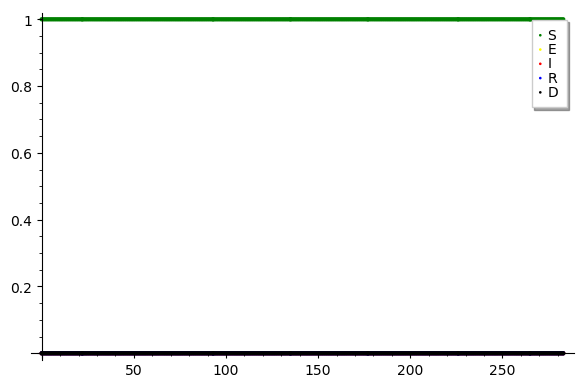

In [7]:
plot0 = list_plot(model_out_0, color = 'green', pointsize = 10, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1, color = 'yellow', pointsize = 10, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2, color = 'red', pointsize = 10, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3, color = 'blue', pointsize = 10, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4, color = 'black', pointsize = 10, alpha = 1, legend_label = 'D')

plot0.legend()
plot1.legend()
plot2.legend()
plot3.legend()
plot4.legend()

show(plot0 + plot1 + plot2 + plot3 + plot4)

### Considerando até 15 intervalos de tempo

In [8]:
def modeling(t_qtd, t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13, t14, t15,
             B0, rho1, rho2, rho3, rho4, rho5, rho6, rho7, rho8, rho9, rho10, rho11, rho12, rho13, rho14, rho15,
             Ti, alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, alpha7, alpha8, alpha9, alpha10, alpha11, alpha12, alpha13, alpha14, alpha15,
             method, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15):
    
    tempos = [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13, t14, t15]
    rho    = [rho1, rho2, rho3, rho4, rho5, rho6, rho7, rho8, rho9, rho10, rho11, rho12, rho13, rho14, rho15]
    alpha  = [alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, alpha7, alpha8, alpha9, alpha10, alpha11, alpha12, alpha13, alpha14, alpha15]
    f      = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15]
    
    tempos = tempos[0:t_qtd]
    rho    = rho[0:t_qtd]
    alpha  = alpha[0:t_qtd]
    f      = f[0:t_qtd]
    inits  = [1 - 1e-6, 0, 1e-6, 0, 0]
    
    T = ode_solver()
    T.function = model
    inits = [1 - 1e-6, 0, 1e-6, 0, 0]
    tspan = [0, 300]
    T.ode_solve(tspan, inits, num_points = 280, params = [B0, Ti, tempos, alpha, rho, f, method])
    
    model_out_0 = [(k[0], k[1][0]) for k in T.solution]
    model_out_1 = [(k[0], k[1][1]) for k in T.solution]
    model_out_2 = [(k[0], k[1][2]) for k in T.solution]
    model_out_3 = [(k[0], k[1][3]) for k in T.solution]
    model_out_4 = [(k[0], k[1][4]) for k in T.solution]

    plot0 = list_plot(model_out_0, color = 'green', pointsize = 10, alpha = 1, legend_label = 'S')
    plot1 = list_plot(model_out_1, color = 'yellow', pointsize = 10, alpha = 1, legend_label = 'E')
    plot2 = list_plot(model_out_2, color = 'red', pointsize = 10, alpha = 1, legend_label = 'I')
    plot3 = list_plot(model_out_3, color = 'blue', pointsize = 10, alpha = 1, legend_label = 'R')
    plot4 = list_plot(model_out_4, color = 'black', pointsize = 10, alpha = 1, legend_label = 'D')

    plot0.legend()
    plot1.legend()
    plot2.legend()
    plot3.legend()
    plot4.legend()

    show(plot0 + plot1 + plot2 + plot3 + plot4)
    
##################################################################################################################

interact(modeling,
         t_qtd   = input_box(8, type = int, label = "Divisões de tempo: "),
         t1      = slider([i for i in range(1, 300)], default = 22, label = "Final do t1: "),
         t2      = slider([i for i in range(1, 300)], default = 93, label = "Final do t2: "),
         t3      = slider([i for i in range(1, 300)], default = 135, label = "Final do t3: "),
         t4      = slider([i for i in range(1, 300)], default = 177, label = "Final do t4: "),
         t5      = slider([i for i in range(1, 300)], default = 226, label = "Final do t5: "),
         t6      = slider([i for i in range(1, 300)], default = 265, label = "Final do t6: "),
         t7      = slider([i for i in range(1, 300)], default = 283, label = "Final do t7: "),
         t8      = slider([i for i in range(1, 300)], default = 284, label = "Final do t8: "),
         t9      = slider([i for i in range(1, 300)], default = 285, label = "Final do t9: "),
         t10     = slider([i for i in range(1, 300)], default = 286, label = "Final do t10: "),
         t11     = slider([i for i in range(1, 300)], default = 287, label = "Final do t11: "),
         t12     = slider([i for i in range(1, 300)], default = 288, label = "Final do t12: "),
         t13     = slider([i for i in range(1, 300)], default = 289, label = "Final do t13: "),
         t14     = slider([i for i in range(1, 300)], default = 290, label = "Final do t14: "),
         t15     = slider([i for i in range(1, 300)], default = 291, label = "Final do t15: "),
         B0      = input_box(10.0, type = float, label = "B0: "),
         rho1    = slider([i/100 for i in range(1, 100)], default = 0.5, label = "rho1: "),
         rho2    = slider([i/100 for i in range(1, 100)], default = 0.5, label = "rho2: "),
         rho3    = slider([i/100 for i in range(1, 100)], default = 0.5, label = "rho3: "),
         rho4    = slider([i/100 for i in range(1, 100)], default = 0.5, label = "rho4: "),
         rho5    = slider([i/100 for i in range(1, 100)], default = 0.5, label = "rho5: "),
         rho6    = slider([i/100 for i in range(1, 100)], default = 0.5, label = "rho6: "),
         rho7    = slider([i/100 for i in range(1, 100)], default = 0.5, label = "rho7: "),
         rho8    = slider([i/100 for i in range(1, 100)], default = 0.5, label = "rho8: "),
         rho9    = slider([i/100 for i in range(1, 100)], default = 0.5, label = "rho9: "),
         rho10   = slider([i/100 for i in range(1, 100)], default = 0.5, label = "rho10: "),
         rho11   = slider([i/100 for i in range(1, 100)], default = 0.5, label = "rho11: "),
         rho12   = slider([i/100 for i in range(1, 100)], default = 0.5, label = "rho12: "),
         rho13   = slider([i/100 for i in range(1, 100)], default = 0.5, label = "rho13: "),
         rho14   = slider([i/100 for i in range(1, 100)], default = 0.5, label = "rho14: "),
         rho15   = slider([i/100 for i in range(1, 100)], default = 0.5, label = "rho15: "),
         Ti      = input_box(0.1, type = float, label = "Ti: "),
         alpha1  = slider([i/100 for i in range(1, 100)], default = 0.5, label = "alpha1: "),
         alpha2  = slider([i/100 for i in range(1, 100)], default = 0.5, label = "alpha2: "),
         alpha3  = slider([i/100 for i in range(1, 100)], default = 0.5, label = "alpha3: "),
         alpha4  = slider([i/100 for i in range(1, 100)], default = 0.5, label = "alpha4: "),
         alpha5  = slider([i/100 for i in range(1, 100)], default = 0.5, label = "alpha5: "),
         alpha6  = slider([i/100 for i in range(1, 100)], default = 0.5, label = "alpha6: "),
         alpha7  = slider([i/100 for i in range(1, 100)], default = 0.5, label = "alpha7: "),
         alpha8  = slider([i/100 for i in range(1, 100)], default = 0.5, label = "alpha8: "),
         alpha9  = slider([i/100 for i in range(1, 100)], default = 0.5, label = "alpha9: "),
         alpha10 = slider([i/100 for i in range(1, 100)], default = 0.5, label = "alpha10: "),
         alpha11 = slider([i/100 for i in range(1, 100)], default = 0.5, label = "alpha11: "),
         alpha12 = slider([i/100 for i in range(1, 100)], default = 0.5, label = "alpha12: "),
         alpha13 = slider([i/100 for i in range(1, 100)], default = 0.5, label = "alpha13: "),
         alpha14 = slider([i/100 for i in range(1, 100)], default = 0.5, label = "alpha14: "),
         alpha15 = slider([i/100 for i in range(1, 100)], default = 0.5, label = "alpha15: "),
         method  = input_box("e", type = str, label = "Method: "),
         f1      = slider([i/100 for i in range(1, 100)], default = 0.5, label = "f1: "),
         f2      = slider([i/100 for i in range(1, 100)], default = 0.5, label = "f2: "),
         f3      = slider([i/100 for i in range(1, 100)], default = 0.5, label = "f3: "),
         f4      = slider([i/100 for i in range(1, 100)], default = 0.5, label = "f4: "),
         f5      = slider([i/100 for i in range(1, 100)], default = 0.5, label = "f5: "),
         f6      = slider([i/100 for i in range(1, 100)], default = 0.5, label = "f6: "),
         f7      = slider([i/100 for i in range(1, 100)], default = 0.5, label = "f7: "),
         f8      = slider([i/100 for i in range(1, 100)], default = 0.5, label = "f8: "),
         f9      = slider([i/100 for i in range(1, 100)], default = 0.5, label = "f9: "),
         f10     = slider([i/100 for i in range(1, 100)], default = 0.5, label = "f10: "),
         f11     = slider([i/100 for i in range(1, 100)], default = 0.5, label = "f11: "),
         f12     = slider([i/100 for i in range(1, 100)], default = 0.5, label = "f12: "),
         f13     = slider([i/100 for i in range(1, 100)], default = 0.5, label = "f13: "),
         f14     = slider([i/100 for i in range(1, 100)], default = 0.5, label = "f14: "),
         f15     = slider([i/100 for i in range(1, 100)], default = 0.5, label = "f15: "))  

Interactive function <function modeling at 0x6fccc0261e0> with 64 widgets
  t_qtd: EvalText(value='8', descrip…

<function modeling at 0x6fccc0261e0>